In [83]:
using FileIO, Plots
gr()
default(fmt = :png)

In [84]:
p_new = load("../experiments/CES0.5/common_parameters.jld2")["parameters"]
p_old = load("../experiments/baseline/common_parameters.jld2")["parameters"]
data = load("../data/impvol_data.jld2")

Dict{String,Any} with 10 entries:
  "import_shares"             => [0.0 7.85e-7 … 0.000689 0.0004425; 7.42e-5 0.0…
  "pwt"                       => [0.824111 0.620073 … 0.747101 1.0]…
  "va"                        => [3271.5 1407.45 … 4209.16 41311.0]…
  "p_sectoral_data"           => [33.0109 64.7924 … 16.8926 36.7882]…
  "io_values"                 => [2.49202e5 2423.0 … 6491.5 0.0; 4183.8 56086.1…
  "total_output"              => [2.00728e6 8.11942e5 … 1.74308e6 66853.4]…
  "intermediate_input_shares" => [0.973154 0.0268455 … 0.528231 0.294862]…
  "trade_balance"             => [1184.95 -1239.14 … -406.84 1074.1]…
  "output_shares"             => [0.967079 0.032921 … 0.521898 0.318506]…
  "beta"                      => [0.230777 0.441 … 0.297884 0.370242]…

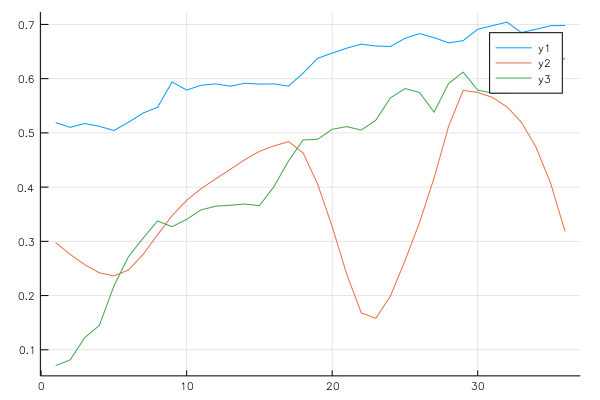

In [85]:
va_share = data["va"] ./ sum(data["va"], 3)
plot([va_share[1,21,end,:] p_old[:final_expenditure_shares][1,21,end,:] p_new[:final_expenditure_shares][1,21,end,:]])

In [86]:
NT_prices = data["pwt"] .* (p_new[:nu_njt][:,:,end:end,:] ./ p_new[:final_expenditure_shares][:,:,end:end,:]) .^ (1/(p_new[:sigma]-1))

1×25×1×36 Array{Float64,4}:
[:, :, 1, 1] =
 0.31749  0.102116  0.467489  0.685054  …  0.0389128  0.60205  0.36566  1.0

[:, :, 1, 2] =
 0.601705  0.187557  0.593371  0.67952  …  0.732807  0.359904  0.969859

[:, :, 1, 3] =
 0.851984  0.219652  0.641001  0.738462  …  0.714926  0.365223  0.917197

...

[:, :, 1, 34] =
 1.30778  1.53642  1.91837  1.61175  …  1.41473  1.92304  1.94259  1.66599

[:, :, 1, 35] =
 1.18863  1.41628  1.86996  1.56076  …  1.29817  1.75978  1.76613  1.51953

[:, :, 1, 36] =
 1.16104  1.36641  1.64172  1.2147  …  1.15822  1.61497  1.53441  1.23949

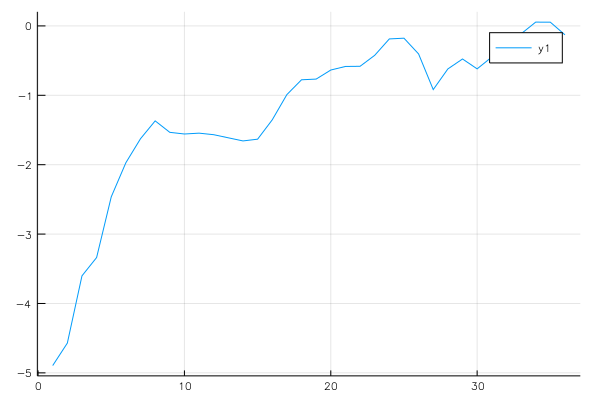

In [87]:
plot(log.(NT_prices[1,21,1,:]))

In [88]:
include("../equilibrium.jl")
include("../calibrate_params.jl")
using CalibrateParameters

In [89]:
# broad country weights for final expenditure
country_weights = sum(data["va"], (1,3,4))
country_weights = country_weights ./ sum(country_weights, 2)
CalibrateParameters.calculate_p_and_nu!(p_new, data, p_new[:final_expenditure_shares], country_weights)
CalibrateParameters.calculate_p_and_nu!(p_old, data, p_old[:final_expenditure_shares], country_weights)

1×25×24×36 Array{Float64,4}:
[:, :, 1, 1] =
 0.0798495  0.0799227  0.0798929  …  0.0798687  0.0798855  0.0798156

[:, :, 2, 1] =
 0.0907824  0.0908547  0.0908108  …  0.0908042  0.090809  0.0907619

[:, :, 3, 1] =
 0.00771433  0.0077157  0.00771401  …  0.00771308  0.00771178  0.00770802

...

[:, :, 22, 1] =
 0.0113213  0.0113068  0.0113197  …  0.0113174  0.0113173  0.0113109

[:, :, 23, 1] =
 0.0126673  0.0126685  0.0126632  …  0.0126629  0.012664  0.0126589

[:, :, 24, 1] =
 0.486002  0.485854  0.486138  0.486164  …  0.486108  0.486057  0.486341

[:, :, 1, 2] =
 0.0768217  0.0768976  0.0768711  …  0.0768542  0.0768748  0.0768042

[:, :, 2, 2] =
 0.0885418  0.0886212  0.0885848  …  0.0885751  0.0885881  0.0885417

[:, :, 3, 2] =
 0.00732306  0.00732456  0.00732386  …  0.00732256  0.00732274  0.00731906

...

[:, :, 22, 2] =
 0.013449  0.0134339  0.01345  0.0134453  …  0.0134455  0.0134481  0.0134398

[:, :, 23, 2] =
 0.0121373  0.01214  0.012135  0.0121377  …  0.0121351  0.0121377  0.0

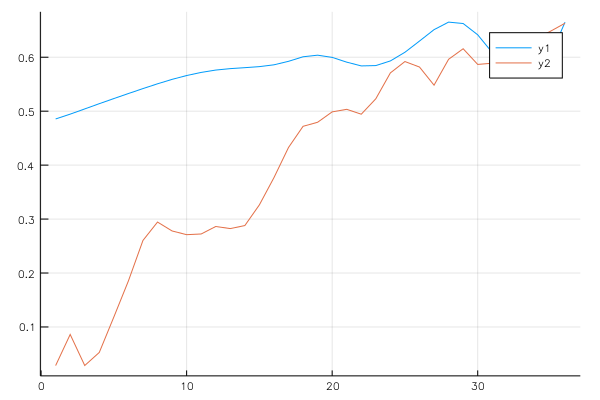

In [90]:
plot([p_old[:final_expenditure_shares][1,21,end,:] p_new[:final_expenditure_shares][1,21,end,:]])

In [91]:
P_nt = ImpvolEquilibrium.CES_price_index(p_new[:nu_njt], p_new[:p_sectoral], p_new[:sigma])

1×25×1×36 Array{Float64,4}:
[:, :, 1, 1] =
 0.824111  0.620073  0.816447  1.0138  …  0.469671  1.04781  0.747101  1.0

[:, :, 1, 2] =
 1.14148  0.796504  0.997516  1.11229  …  0.59209  1.25374  0.82682  1.08222

[:, :, 1, 3] =
 1.53575  0.937473  1.15413  1.29475  1.5133  …  1.38886  0.947835  1.19418

...

[:, :, 1, 34] =
 2.69886  2.82712  2.94991  2.61638  …  2.502  3.32238  3.04059  2.74059

[:, :, 1, 35] =
 2.79409  2.95742  3.09869  2.90232  …  2.66748  3.48512  3.21904  2.87453

[:, :, 1, 36] =
 3.48526  3.58996  3.74531  3.40643  …  3.26938  4.22275  3.88466  3.22416

In [92]:
shares = p_new[:nu_njt] .* (p_new[:p_sectoral] ./ P_nt) .^ p_new[:sigma]

1×25×24×36 Array{Float64,4}:
[:, :, 1, 1] =
 0.101868  0.161102  0.133652  0.0909465  …  0.114875  0.127624  0.0823595

[:, :, 2, 1] =
 0.109316  0.162689  0.127763  0.112404  …  0.123233  0.126529  0.0975958

[:, :, 3, 1] =
 0.0114671  0.0125298  0.0112309  …  0.0105732  0.00971754  0.00761626

...

[:, :, 22, 1] =
 0.0174676  0.00920921  0.0162979  …  0.0147307  0.0146526  0.0110227

[:, :, 23, 1] =
 0.0190027  0.0198904  0.0161921  …  0.0159734  0.0166647  0.0136586

[:, :, 24, 1] =
 0.236037  0.111508  0.31486  0.352722  …  0.315621  0.281769  0.455865

[:, :, 1, 2] =
 0.0894397  0.146532  0.123384  0.0900946  …  0.110522  0.126351  0.0798284

[:, :, 2, 2] =
 0.0948441  0.148416  0.120886  0.108542  …  0.11442  0.123157  0.094794

[:, :, 3, 2] =
 0.00972891  0.0107766  0.0102728  …  0.00940017  0.00951886  0.0074014

...

[:, :, 22, 2] =
 0.0184946  0.0105531  0.0191759  …  0.0162163  0.0178323  0.0131304

[:, :, 23, 2] =
 0.0157207  0.017592  0.0142941  …  0.0143751  0.0159708  0.

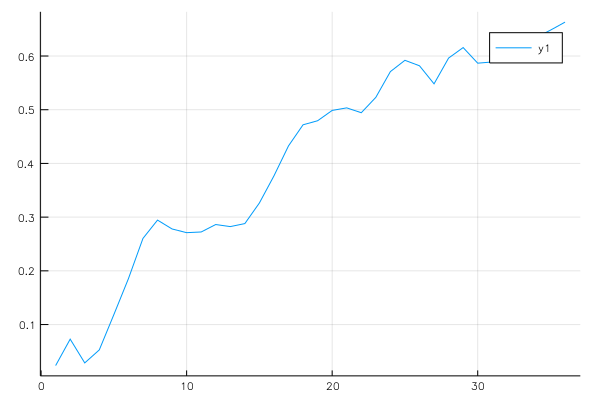

In [93]:
plot(shares[1,21,end,:])

In [94]:
p_new[:nu_njt][1,1,:,:]

24×36 Array{Float64,2}:
 0.0823595   0.0752101   0.0698179   0.0683605   …  0.0151617    0.0142296  
 0.0975958   0.0908359   0.0890766   0.0869899      0.0377856    0.0407832  
 0.00761626  0.00709235  0.00694746  0.00669293     0.00496317   0.00440603 
 0.0338462   0.0327098   0.0311332   0.031537       0.0071631    0.00688064 
 0.0189735   0.0181765   0.0178981   0.0184416      0.00478461   0.00462087 
 0.00753906  0.00741945  0.00735992  0.00751984  …  0.00545532   0.0079434  
 0.00781668  0.00688147  0.00664798  0.00690084     0.000794089  0.000710847
 0.0109893   0.0113579   0.0112871   0.0109953      0.00319251   0.00230745 
 0.00407871  0.00369969  0.00337205  0.0031405      0.00136032   0.000661048
 0.025723    0.0288169   0.0275715   0.0275351      0.00951197   0.0111082  
 0.0180079   0.0183721   0.0179836   0.017463    …  0.0184759    0.0254586  
 0.00365125  0.00371249  0.00351266  0.00338997     0.00752292   0.00681495 
 0.0139264   0.0137902   0.0128699   0.011852       

In [95]:
p_old[:nu_njt][1,1,:,:]

24×36 Array{Float64,2}:
 0.0798156   0.0767939   0.0736944   …  0.0256966   0.0239739   0.0207166  
 0.0907619   0.0885328   0.0864432      0.052778    0.052325    0.0511031  
 0.00770802  0.00731832  0.0069718      0.00721099  0.00664817  0.00511881 
 0.0301335   0.0285935   0.0271481      0.0083415   0.00793086  0.00666973 
 0.0172927   0.0165281   0.0158556      0.00557325  0.00543236  0.00461774 
 0.00580888  0.00562106  0.00545169  …  0.00600114  0.00688099  0.00767561 
 0.00745769  0.00683786  0.00637808     0.00129014  0.00117938  0.000903649
 0.0118373   0.0119801   0.0119828      0.00590332  0.00528784  0.00346681 
 0.0039466   0.00356028  0.00325236     0.00267284  0.00213428  0.000837562
 0.0247044   0.026565    0.0281356      0.0185741   0.0201498   0.0209648  
 0.0179408   0.0179751   0.0181037   …  0.0307537   0.0339671   0.0350234  
 0.00302685  0.00301099  0.00299236     0.0133561   0.0108608   0.00771795 
 0.0130098   0.0121215   0.0113487      0.00509976  0.00483805  

In [96]:
shares[1,21,end,:]

36-element Array{Float64,1}:
 0.0236196
 0.0728311
 0.0285501
 0.0528158
 0.118457 
 0.185348 
 0.260382 
 0.294463 
 0.277977 
 0.271081 
 0.272363 
 0.286221 
 0.282376 
 ⋮        
 0.592002 
 0.58181  
 0.548185 
 0.596196 
 0.615729 
 0.586667 
 0.588912 
 0.597795 
 0.611184 
 0.634369 
 0.648177 
 0.663121 

In [137]:
inv(p[:d][:,:,end-2,end])

25×25 Array{Float64,2}:
  1.80525      -0.0101053     -2.75177    …    0.0175302    -0.0762846 
 -0.0242031     3.67572       16.7739         -0.504154      0.471559  
 -0.168153      2.39205     -254.594           3.35556      -3.16591   
  0.0056589    -0.012878      -1.98954        -0.00788445   -1.33011   
  0.000173427   0.00183852    -0.394975        0.0121873    -0.00441057
  0.00562185    0.00267296    -0.579997   …    0.0397533    -1.0544    
  0.0283096    -0.0307048     -6.21204         0.402527     -4.556     
  0.000369326   0.00816838    -3.45465         0.0934392     0.0857768 
 -0.0253155    -0.144289      30.7819         -1.06026       0.0655149 
  0.0163218    -0.0359515    -11.2229          0.323996     -0.37477   
  0.00594376   -0.0610896      0.896473   …   -0.0110035     0.353965  
 -0.000232981  -0.00468268     0.704172       -0.0258684    -0.00109979
 -0.0511582     1.42067       -4.56009        -1.52611     -13.4096    
 -0.000764816  -0.0352993      1.16074  

In [139]:
d_c, d_t = CalibrateParameters.DetrendUtilities.detrend(p[:d], p[:bp_weights])

([1.0339e-15 7.94093e-22 … 6.84403e-19 3.86247e-19; 8.04681e-20 9.4369e-16 … 4.92973e-19 1.36203e-18; … ; 6.24772e-18 2.32934e-20 … 9.08995e-16 1.07336e-17; 5.0822e-19 1.21761e-21 … 1.999e-19 1.0339e-15]

[1.02002e-15 5.67512e-20 … 5.9089e-18 2.03288e-18; 2.44623e-18 8.39606e-16 … 4.09286e-18 8.86335e-18; … ; 1.66425e-17 4.74338e-19 … 8.32667e-16 6.28837e-18; 4.90601e-18 9.82558e-20 … 3.82181e-18 9.71445e-16]

[9.08995e-16 3.17637e-22 … 7.31836e-18 8.5652e-18; 9.89334e-19 1.06165e-15 … 3.59142e-19 1.23667e-19; … ; 1.67421e-21 2.4564e-20 … 9.71445e-16 3.41524e-18; 2.13413e-22 1.00916e-22 … 4.13352e-19 1.02696e-15]

...

[8.53484e-16 5.01444e-19 … 4.0766e-17 7.71952e-17; 1.47723e-18 9.84498e-28 … 2.13046e-17 3.55618e-16; … ; 4.84503e-19 1.20617e-18 … 8.53484e-16 5.05238e-17; 2.28699e-19 1.0842e-18 … 1.40946e-17 8.74301e-16]

[9.22873e-16 5.89535e-19 … 1.51788e-17 1.24683e-17; 1.43996e-19 7.70217e-16 … 1.01915e-17 3.36103e-18; … ; 1.20617e-18 2.46656e-18 … 8.74301e-16 1.4962e-17; 2.77827e

In [143]:
d = p[:d]
d_t[:,:,end-2,end-2] .- d_t[:,:,end-2,end] 

25×25 Array{Float64,2}:
 -0.0161707    -0.000925595  -1.68635e-5   …  -0.00963452    0.0367313  
  0.000172875   0.0447195     0.000563123      0.00067243   -0.0260668  
  0.000101982  -0.0020741     0.0537665        0.00530104   -0.0952908  
  5.43923e-5   -0.00114755    5.3964e-5        0.00486915   -0.0151304  
 -1.97932e-5    0.000135107  -2.20159e-5       3.36378e-5    0.00370967 
 -2.47665e-5    0.000597023   3.49237e-5   …  -0.000503331   0.164966   
  9.38524e-5    0.000915725  -0.00309607       0.0138529    -0.0552033  
 -0.000454253  -0.000432767   0.000311825      0.00810641   -0.000983929
 -0.00123553   -0.00076423   -0.00527057      -0.0181137    -0.0649341  
  2.97467e-5    0.000288122   0.000731011      0.00293686    0.0578394  
  3.18473e-5   -0.000496705   0.000134167  …  -0.00252508    0.0681044  
  0.000436544   0.000298178   0.00173182      -0.00166734   -0.0475403  
  7.16442e-5   -0.000265741   0.000786925      0.0116084     0.0589411  
 -0.000252238  -0.000871051

In [148]:
inv(d[:,:,end-2,end-2])

25×25 Array{Float64,2}:
  1.84892      -0.0112752     0.0522532   …   -0.0483432       -1.87204 
  0.0351641     2.65225       0.0980923       -0.0959576      -11.9797  
  0.112761      0.0475368    15.5302          -0.179278       -26.1582  
 -0.155871     -0.151352     -0.235185         0.643325        48.4896  
  0.000638879  -0.000131333   0.00654792      -0.00133839      -0.197061
 -0.000308795  -0.0050858     0.0236646   …    0.0660917        0.202326
 -0.301904     -0.291616     -0.406586         1.45098         94.2021  
  0.00862996    0.00645432    0.0282497       -0.0396368       -2.41102 
 -0.0135838    -0.0010664    -0.160712         0.00705077       2.77605 
 -0.0239283    -0.105842     -0.254828        -0.021055         8.13646 
  0.0166569     0.00805384   -0.00550749  …   -0.0206157       -4.56932 
 -0.0444261    -0.0467362    -0.0614291        0.212377        13.9891  
 12.5148       12.0124       19.3661         -59.4375       -3916.74    
 -0.0465992    -0.0617082  

In [8]:
using GR
version()

"0.35.0"

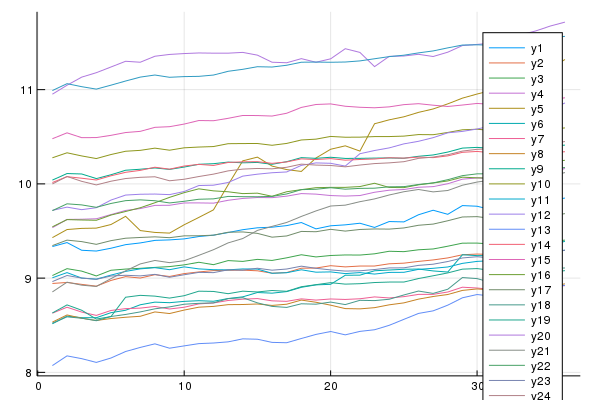

MethodError: [91mMethodError: no method matching complete_type(::QuoteNode)[0m
Closest candidates are:
  complete_type([91m::Type{#s13} where #s13<:Function[39m) at /Applications/JuliaPro-0.6.4.1.app/Contents/Resources/pkgs-0.6.4.1/v0.6/IJulia/src/handlers.jl:67
  complete_type([91m::Type{#s13} where #s13<:Type[39m) at /Applications/JuliaPro-0.6.4.1.app/Contents/Resources/pkgs-0.6.4.1/v0.6/IJulia/src/handlers.jl:68
  complete_type([91m::Type{#s13} where #s13<:Tuple[39m) at /Applications/JuliaPro-0.6.4.1.app/Contents/Resources/pkgs-0.6.4.1/v0.6/IJulia/src/handlers.jl:69
  ...[39m

In [40]:
plot(log.(p[:A][1,:,end,:]'))

In [42]:
minimum(p[:nu_njt])

-0.0075208532954233725